# 임포트 부분

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from konlpy.tag import Okt
import re
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense,GRU,Embedding,LSTM

In [65]:
from tensorflow.keras.preprocessing import sequence

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [68]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, Input, GlobalMaxPool1D, Flatten

# 데이터 불러오기

In [24]:
#data = pd.read_csv('total_ex.csv', encoding='cp949')
a = pd.read_excel('total_최종.xlsx')
x=a['data']
y=a['label']
print(x)

0      Game Designer(게임 디자이너)\n\n비디오 게임 제작자의 부류. 영어로는...
1      게임크리에이터, 게임디자이너\n게임기획자는 PC 게임, 네트워크 게임 등 게임용 소...
2      게임기획자란?\n실제 게임제작, 게임프로그래밍이나 그래픽 작업에 들어가기 전 어떤 ...
3      하는일\n컴퓨터 게임의 아이템과 스토리, 캐릭터 등을 구성 및 기획하고 제작 과정을...
4      게임기획자\n\n게임 기획자는 게임 회사의 기획팀에 속해서 일하는 사람들을 말합니다...
                             ...                        
118    안녕하세요. 자기소개 부탁드립니다.\n안녕하세요! 개발자 고영정이라고 합니다. 토스...
119    버즈빌에 대한 간단한 소개도 부탁드립니다.\n버즈빌은 글로벌 잠금 화면 광고 플랫폼...
120    반갑습니다. 자기소개 부탁 드립니다.\n안녕하세요. 캐시슬라이드에서 제품길드의 클라...
121    안녕하세요. 간단한 자기소개 부탁 드립니다.\n안녕하세요! 와이즈솔루션 테크니컬 파...
122    모바일 앱이란?\n모바일 앱은 응용 프로그램(application program)들...
Name: data, Length: 123, dtype: object


# 형태소 분석

In [25]:
okt = Okt()
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in x]

# 특수기호 제거

In [26]:
temp=[]
for j in range(len(morph_tokenized_sentences)):
    for document in morph_tokenized_sentences[j]:
        temp.append(re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', document)) #특수기호 제거, 정규 표현식    
    morph_tokenized_sentences[j] = temp
    temp=[]


# 불용어제거

In [27]:
stopwords = ['을', '를', '이', '가', '은', '는','이','그','있','n','nn','t','의','되','라','한','다','하','더','에','서','나',
            '과','고','며','와','지','해','도','지','못','안','않','로','들','된','것','에는','안녕',
            '반갑','내','등','할','자','있다','','직','군','위','식','각','출','창','시','수','및','신','영','화','살','여','양','송','대','데',
            '연','구','살','장','또','적','D','력','인','향','년','후','생','기','봐','문','니','사','본','제','작','관','일','분','야',
            '중','거','명','어','개','타','제','또는','요','전','몇','중','에서','있는데요','된다','또한','되','돼','않','으로','만','있습니다','하는','하는것이',
            '만','푹','지금','하는','곳','로는','한다','이다','에서는','이라','고하','에서보다','이라고도','경','제등','이서','이라는',
            '가는','되는','마다','야하며','야한다','필요하다','되었을','필요한다','게','하고','좋아하고','원하는','통해','하여이에','고도',
            '세','드리지','않습니다','잉','님','합니다']
f = open('./kor_stopword.txt',encoding='UTF8')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()
token=[]
for w in morph_tokenized_sentences:
    temp_X=[]
    temp_X =w

    temp_X = [t for t in temp_X if not t in stopwords]
    token.append(temp_X)

# X데이터 text_to_sequences 작업

In [28]:
max_word = 8241 #8240+1
token2 = Tokenizer(num_words=max_word)
token2.fit_on_texts(token)
print(token2.fit_on_texts(token))
# #print(token2.word_index)
tok = token2.texts_to_sequences(token)
print(tok)

None
[[3362, 1, 102, 1099, 2196, 2197, 633, 1, 102, 3363, 28, 3364, 50, 251, 81, 31, 81, 487, 439, 407, 1641, 235, 487, 28, 1, 37, 19, 122, 3365, 440, 122, 3366, 1642, 3367, 81, 352, 3368, 408, 1308, 38, 3369, 37, 122, 140, 1, 441, 122, 3370, 1, 236, 3371, 27, 1100, 3, 3, 77, 90, 1, 42, 35, 27, 90, 2, 1, 32, 17, 173, 18, 1, 126, 18, 12, 2, 165, 1643, 13, 11, 21, 219, 1, 126, 408, 144, 353, 3372, 303, 144, 165, 1643, 332, 812, 11, 21, 354, 28, 1, 126, 813, 2198, 536, 165, 31, 1644, 1309, 1101, 21, 157, 2199, 937, 1, 21, 70, 1, 70, 6, 3, 63, 441, 70, 11, 63, 31, 537, 3, 3373, 3, 6, 634, 6, 3374, 1, 716, 31, 119, 333, 21, 1, 1645, 3375, 1310, 1, 938, 1, 938, 1311, 17, 21, 1, 442, 3376, 2200, 3377, 165, 31], [1, 3378, 1, 102, 1, 3, 158, 1, 71, 1, 1646, 44, 47, 11, 99, 174, 443, 1312, 635, 31, 1, 444, 192, 1, 269, 80, 53, 252, 123, 717, 3, 72, 1, 379, 291, 814, 718, 1, 380, 1, 144, 68, 355, 42, 408, 939, 220, 278, 9, 581, 1, 12, 47, 1, 44, 1313, 1647, 221, 237, 6, 1314, 72, 1315, 815, 1, 21

# One_hot GRU 모델

In [29]:
enc = LabelEncoder()
enc.fit(y)
Y_label = enc.transform(y)
max_len = 1290
X_train = pad_sequences(tok, maxlen=max_len) # 훈련용 뉴스 기사 패딩
y_train = tf.keras.utils.to_categorical(Y_label)

In [9]:
print(X_train.shape,y_train.shape)

(123, 1290) (123, 3)


In [10]:
one_hot = utils.to_categorical(X_train)

In [13]:
X_train, X_eval, Y_train, Y_eval = train_test_split(one_hot, y_train, test_size=0.1, stratify=y_train,
                                                    random_state=777)
print(X_train.shape)
print(X_eval)

(110, 1290, 8241)
[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0

In [15]:
model = Sequential()
#model.add(Embedding(word_size,63))
model.add(GRU(123,input_shape=(1290,8241))) # RNN 셀의 hidden_size는 32
#model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(123,activation='relu'))

model.add(Dense(3, activation='softmax'))
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 123)               3087054   
_________________________________________________________________
dense (Dense)                (None, 128)               15872     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               1

In [20]:
MODEL_DIR = './model_GRU_end/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + "1차{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
history = model.fit(X_train, Y_train, epochs=50, batch_size = 5,
                    validation_data=(X_eval, Y_eval),callbacks=[checkpointer], verbose=1)

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_eval, Y_eval)[1]))
print(np.argmax(model.predict(X_eval), axis=1))

Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 1.0919 - accuracy: 0.3727
Epoch 00001: val_loss improved from inf to 1.08370, saving model to ./model_GRU_end\1차01-1.0837.hdf5
22/22 [==============================] - 184s 8s/step - loss: 1.0919 - accuracy: 0.3727 - val_loss: 1.0837 - val_accuracy: 0.3846
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 0.9572 - accuracy: 0.3909
Epoch 00002: val_loss did not improve from 1.08370
22/22 [==============================] - 194s 9s/step - loss: 0.9572 - accuracy: 0.3909 - val_loss: 2.0257 - val_accuracy: 0.4615
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 0.7612 - accuracy: 0.6727
Epoch 00003: val_loss did not improve from 1.08370
22/22 [==============================] - 193s 9s/step - loss: 0.7612 - accuracy: 0.6727 - val_loss: 1.3299 - val_accuracy: 0.3077
Epoch 4/50
22/22 [==============================] - ETA: 0s - loss: 0.6043 - accuracy: 0.7273
Epoch 00004: val_loss did not i

Epoch 30/50
22/22 [==============================] - ETA: 0s - loss: 1.6256e-07 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 1.08370
22/22 [==============================] - 192s 9s/step - loss: 1.6256e-07 - accuracy: 1.0000 - val_loss: 6.7815 - val_accuracy: 0.4615
Epoch 31/50
22/22 [==============================] - ETA: 0s - loss: 1.5606e-07 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 1.08370
22/22 [==============================] - 193s 9s/step - loss: 1.5606e-07 - accuracy: 1.0000 - val_loss: 6.8017 - val_accuracy: 0.4615
Epoch 32/50
22/22 [==============================] - ETA: 0s - loss: 1.4630e-07 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 1.08370
22/22 [==============================] - 193s 9s/step - loss: 1.4630e-07 - accuracy: 1.0000 - val_loss: 6.8235 - val_accuracy: 0.4615
Epoch 33/50
22/22 [==============================] - ETA: 0s - loss: 1.3872e-07 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 1.0837

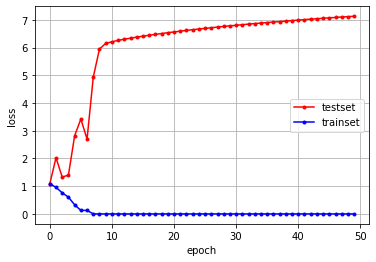

In [21]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
import matplotlib.pyplot as plt
#크로스되는 부분으로 에폭을 조정해야 오버피팅을 막을수 있음
plt.plot(x_len,y_vloss,marker='.',c='red',label='testset')
plt.plot(x_len,y_loss,marker='.',c='blue',label='trainset')
plt.legend(loc='best')
plt.grid()#모눈종이형태
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# EMB_LSTM 모델

In [32]:
X_train1, X_eval1, Y_train1, Y_eval1 = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train,
                                                    random_state=777)

In [12]:
word_size=len(token2.word_index)+1
word_size

8241

In [35]:
model = Sequential()
model.add(Embedding(word_size,1290))
model.add(LSTM(123)) # RNN 셀의 hidden_size는 32
#model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(1024,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(256,activation='relu'))
model.add(Dense(16,activation='relu'))
# model.add(Dense(123,activation='relu'))

model.add(Dense(3, activation='softmax'))
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 1290)        10630890  
_________________________________________________________________
lstm (LSTM)                  (None, 123)               695688    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                7936      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 51        
Total params: 11,337,173
Trainable params: 11,337,173
Non-trainable params: 0
__________________________________________

In [37]:
MODEL_DIR = './model_GRU_end2/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + "4차{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
history1 = model.fit(X_train1, Y_train1, epochs=50, batch_size = 5,
                    validation_data=(X_eval1, Y_eval1),callbacks=[checkpointer], verbose=1)

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_eval1, Y_eval1)[1]))
print(np.argmax(model.predict(X_eval1), axis=1))

Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 1.1072 - accuracy: 0.5091
Epoch 00001: val_loss improved from inf to 0.93449, saving model to ./model_GRU_end2\4차01-0.9345.hdf5
22/22 [==============================] - 46s 2s/step - loss: 1.1072 - accuracy: 0.5091 - val_loss: 0.9345 - val_accuracy: 0.6923
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 0.8134 - accuracy: 0.6091
Epoch 00002: val_loss improved from 0.93449 to 0.67398, saving model to ./model_GRU_end2\4차02-0.6740.hdf5
22/22 [==============================] - 46s 2s/step - loss: 0.8134 - accuracy: 0.6091 - val_loss: 0.6740 - val_accuracy: 0.6923
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 0.4362 - accuracy: 0.7727
Epoch 00003: val_loss improved from 0.67398 to 0.56948, saving model to ./model_GRU_end2\4차03-0.5695.hdf5
22/22 [==============================] - 46s 2s/step - loss: 0.4362 - accuracy: 0.7727 - val_loss: 0.5695 - val_accuracy: 0.6923
Epoch 4/50
22/22 

Epoch 30/50
22/22 [==============================] - ETA: 0s - loss: 6.2872e-05 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.46118
22/22 [==============================] - 46s 2s/step - loss: 6.2872e-05 - accuracy: 1.0000 - val_loss: 0.7780 - val_accuracy: 0.6923
Epoch 31/50
22/22 [==============================] - ETA: 0s - loss: 5.9084e-05 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.46118
22/22 [==============================] - 46s 2s/step - loss: 5.9084e-05 - accuracy: 1.0000 - val_loss: 0.7822 - val_accuracy: 0.6923
Epoch 32/50
22/22 [==============================] - ETA: 0s - loss: 5.5588e-05 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.46118
22/22 [==============================] - 46s 2s/step - loss: 5.5588e-05 - accuracy: 1.0000 - val_loss: 0.7863 - val_accuracy: 0.6923
Epoch 33/50
22/22 [==============================] - ETA: 0s - loss: 5.2337e-05 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 0.46118
2

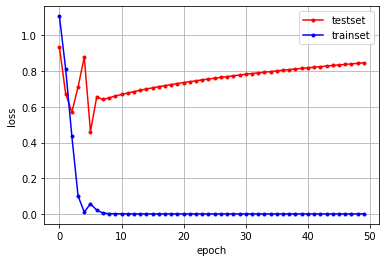

In [38]:
y_vloss1 = history1.history['val_loss']
y_loss1 = history1.history['loss']
x_len1 = np.arange(len(y_loss1))
import matplotlib.pyplot as plt
#크로스되는 부분으로 에폭을 조정해야 오버피팅을 막을수 있음
plt.plot(x_len1,y_vloss1,marker='.',c='red',label='testset')
plt.plot(x_len1,y_loss1,marker='.',c='blue',label='trainset')
plt.legend(loc='best')
plt.grid()#모눈종이형태
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# EMB_LSTM_max word 모델

In [58]:
x1_1 = np.array(token)

<ipython-input-58-3e00e8a61a1c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x1_1 = np.array(token)


In [60]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x1_1, y_train, test_size=0.1, stratify=y_train,
                                                    random_state=777)

In [92]:
max_words1 = 2000
max_len1 = 500

#토크나이저로 변환
#tok = Tokenizer(num_words = max_words)
tok1234 = Tokenizer(num_words = max_words1)
tok1234.fit_on_texts(x_train2)

In [63]:
sequences123 = tok1234.texts_to_sequences(x_train2)

In [66]:
sequences_matrix123 = sequence.pad_sequences(sequences123, maxlen=max_len)

In [75]:
model = Sequential()
#max_words를 50차원에. 즉 1000개의 단어를 50차원에다가. 문장의 길이는 max_len
model.add(Embedding(2000 ,output_dim=50,input_length=max_len1))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_dir = './model1'
#rmsprop optimizer
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = model_dir + "/tt_{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 50)           100000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 500, 64)           29440     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 771       
Total params: 146,851
Trainable params: 146,851
Non-trainable params: 0
________________________________________________

In [76]:
history2 = model.fit(sequences_matrix123, y_train2, batch_size=5, epochs=50, validation_split=0.2 ,callbacks=[checkpoint])

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 1.0996 - accuracy: 0.3295WARNING:tensorflow:Model was constructed with shape (None, 500) for input Tensor("embedding_3_input:0", shape=(None, 500), dtype=float32), but it was called on an input with incompatible shape (None, 1290).

Epoch 00001: val_loss improved from inf to 1.07582, saving model to ./model1\tt_01-1.0758.hdf5
18/18 [==============================] - 4s 239ms/step - loss: 1.0996 - accuracy: 0.3295 - val_loss: 1.0758 - val_accuracy: 0.5455
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 1.0825 - accuracy: 0.3977
Epoch 00002: val_loss improved from 1.07582 to 1.05878, saving model to ./model1\tt_02-1.0588.hdf5
18/18 [==============================] - 4s 221ms/step - loss: 1.0825 - accuracy: 0.3977 - val_loss: 1.0588 - val_accuracy: 0.3636
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 0.9773 - accuracy: 0.5000
Epoch 00003: val_loss improved from 1.05878 to 0.75943,

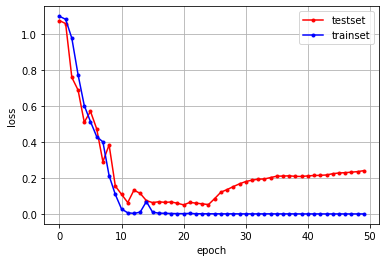

In [96]:
y_vloss2 = history2.history['val_loss']
y_loss2 = history2.history['loss']
x_len2 = np.arange(len(y_loss2))
import matplotlib.pyplot as plt
#크로스되는 부분으로 에폭을 조정해야 오버피팅을 막을수 있음
plt.plot(x_len2,y_vloss2,marker='.',c='red',label='testset')
plt.plot(x_len2,y_loss2,marker='.',c='blue',label='trainset')
plt.legend(loc='best')
plt.grid()#모눈종이형태
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# TF_IDF_1

In [108]:
import pandas as pd
import numpy as np
import tensorflow as tf
from konlpy.tag import Okt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
import scipy

In [115]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [106]:
#data = pd.read_csv('total_ex.csv', encoding='cp949')
a = pd.read_excel('total_최종.xlsx')
x=a['data']
y=a['label']
print(x)

0      Game Designer(게임 디자이너)\n\n비디오 게임 제작자의 부류. 영어로는...
1      게임크리에이터, 게임디자이너\n게임기획자는 PC 게임, 네트워크 게임 등 게임용 소...
2      게임기획자란?\n실제 게임제작, 게임프로그래밍이나 그래픽 작업에 들어가기 전 어떤 ...
3      하는일\n컴퓨터 게임의 아이템과 스토리, 캐릭터 등을 구성 및 기획하고 제작 과정을...
4      게임기획자\n\n게임 기획자는 게임 회사의 기획팀에 속해서 일하는 사람들을 말합니다...
                             ...                        
118    안녕하세요. 자기소개 부탁드립니다.\n안녕하세요! 개발자 고영정이라고 합니다. 토스...
119    버즈빌에 대한 간단한 소개도 부탁드립니다.\n버즈빌은 글로벌 잠금 화면 광고 플랫폼...
120    반갑습니다. 자기소개 부탁 드립니다.\n안녕하세요. 캐시슬라이드에서 제품길드의 클라...
121    안녕하세요. 간단한 자기소개 부탁 드립니다.\n안녕하세요! 와이즈솔루션 테크니컬 파...
122    모바일 앱이란?\n모바일 앱은 응용 프로그램(application program)들...
Name: data, Length: 123, dtype: object


In [99]:
okt = Okt()
#의미가있는 값(단어)로 나누어주는 역할
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in x]

In [107]:
stopwords = ['을', '를', '이', '가', '은', '는','이','그','있','n','nn','t','의','되','라','한','다','하','더','에','서','나',
            '과','고','며','와','지','해','도','지','못','안','않','로','들','된','것','에는','안녕',
            '반갑','내','등','할','자','있다','','직','군','위','식','각','출','창','시','수','및','신','영','화','살','여','양','송','대','데',
            '연','구','살','장','또','적','D','력','인','향','년','후','생','기','봐','문','니','사','본','제','작','관','일','분','야',
            '중','거','명','어','개','타','제','또는','요','전','몇','중','에서','있는데요','된다','또한','되','돼','않','으로','만','있습니다','하는','하는것이',
            '만','푹','지금','하는','곳','로는','한다','이다','에서는','이라','고하','에서보다','이라고도','경','제등','이서','이라는',
            '가는','되는','마다','야하며','야한다','필요하다','되었을','필요한다','게','하고','좋아하고','원하는','통해','하여이에','고도',
            '세','드리지','않습니다','잉','님','합니다']
f = open('./kor_stopword.txt',encoding='UTF8')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()
tf_main=[]
for i, document in enumerate(morph_tokenized_sentences):
    temp_str = ''
    for doc in document:
        doc = re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', str(doc))
        if doc not in stopwords:
            temp_str = temp_str + ''.join(list(doc)) + ' '
    tf_main.append(temp_str)

tf_main

['GameDesigner 게임 디자이너 비디오 게임제작자 부류 영어 게임 디자이너 외래어 디자인 본래 설계 계획 그래픽 담당 그래픽 아트 사운드 포함 넓은 의미 아트 디자인 게임 다양한 분야 영역 믹스 영화 영역 진보 현대 프러덕션 그래픽 음악 연기 스토리 촬영 컴퓨터 사이언스 다양한 영역 필요 게임 반영 영역 섞여 게임 결과물 바뀌도록 관리 해나 기획 기획 요구 역량 게임 기본 프로젝트 관리 역량 개발 게임 필요한 능력 전반 시스템 게임 기반 시스템 프로그램 개발 요소 책임진다 프로그래밍 관련 지식 시나리오 게임 기반 스토리 캐릭터 퀘스트 text 등장 캐릭터 요소 책임진다 문화 예술 관련 지식 레벨 디자인 게임 기반 맵 사이즈 배치 요소 담당 건축 크기 공간 지식 플레이 타임 계산 게임 지식 운영 게임 운영 업무 기획 내용 반영 운영 관련 내용 담당 라이브 기획 가주 기획 업무 병행 업무 밸런싱 게임 수치 담당 데이터 수학 지식 게임 룰 수치화 통찰 게임 경제 게임 경제 시뮬레이션 능력 지식 게임 몬스터 드랍 획득 게임머니 요소 담당 ',
 '게임 크리에이터 게임 디자이너 게임 기획 PC 게임 네트워크 게임 임용 소프트웨어 제작 관련 모든 사항 총괄 지휘 감독 담당 게임 시장조사 소비자 게임 인지 파악 새로운 게임제작 아이디어 구상 기획 작성 게임 장르 대상 연령 층 게임 난이도 게임 캐릭터 역할 특징 기본 스토리 전개 설정 그래픽디자이너 프로그래머 본격 게임 프로그램 제작 게임 소프트웨어 베타테스트 연회 참여 홍보 업무 대사 작성 등세 부적 게임 시나리오 작성 기획 쉽게 그래픽디자이너 프로그래머 전달 게임 제작 상품화 시장 진입 판매 고의 수익 판단 결정 게임 제작 완료 게임 홍보 마케팅 전략 배급 계획 수립 실행 장조 바탕 게임 즐기는 원하는지 파악 통찰 새로운 게임 소재 발굴 창의력 기획 요구 게임 산업 전반 지식 이해 마케팅 홍보 본적지 게임 좋아해야하고 영화 만화 소설 다양한 문화 장르 지식 요구 게임 개발 보통 팀 단위 팀원 원활한 관계 유지 

In [109]:
vect = TfidfVectorizer()
tf_main_v = vect.fit_transform(tf_main)
tf_main_v.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.04577728, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [103]:
enc = LabelEncoder()
enc.fit(y)
Y_label = enc.transform(y)
y_train = tf.keras.utils.to_categorical(Y_label)

In [112]:
scipy.sparse.csr_matrix.sort_indices(tf_main_v)

In [122]:
X_train4, X_eval4, Y_train4, Y_eval4 = train_test_split(tf_main_v, y_train, test_size=0.2, stratify=y_train,
                                                    random_state=666)
print(X_train4.shape)
print(X_eval4)

(98, 7974)
  (0, 41)	0.11372519466550632
  (0, 49)	0.11372519466550632
  (0, 180)	0.11372519466550632
  (0, 220)	0.0934009093968121
  (0, 276)	0.10473155516111364
  (0, 474)	0.09835046638240254
  (0, 626)	0.0803631873736172
  (0, 654)	0.11372519466550632
  (0, 662)	0.07591210179808378
  (0, 712)	0.0934009093968121
  (0, 781)	0.08593760382774045
  (0, 823)	0.0577018958450141
  (0, 829)	0.10586100163051329
  (0, 837)	0.08593760382774045
  (0, 844)	0.04619450775714024
  (0, 849)	0.1380650832186313
  (0, 935)	0.044176658719344335
  (0, 974)	0.10750634971274672
  (0, 983)	0.11037629452306581
  (0, 1003)	0.09567659993337847
  (0, 1030)	0.05599481958612076
  (0, 1039)	0.09801198589712906
  (0, 1180)	0.05955138700244811
  (0, 1199)	0.05365781332621188
  (0, 1203)	0.041034702332468656
  :	:
  (24, 7231)	0.014184539272478798
  (24, 7257)	0.06284567602639167
  (24, 7283)	0.02319601946798461
  (24, 7329)	0.03412121938317419
  (24, 7332)	0.028023279533530027
  (24, 7385)	0.04979078508494674
  (24, 

In [123]:
model = Sequential()
#model.add(Embedding(word_size,63))
#model.add(GRU(63,input_shape=(None,6169))) # RNN 셀의 hidden_size는 32
model.add(Dense(98,input_shape=(98,7974),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(1024,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3, activation='softmax'))
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 98, 98)            781550    
_________________________________________________________________
dense_26 (Dense)             (None, 98, 50)            4950      
_________________________________________________________________
dense_27 (Dense)             (None, 98, 30)            1530      
_________________________________________________________________
dense_28 (Dense)             (None, 98, 10)            310       
_________________________________________________________________
dense_29 (Dense)             (None, 98, 3)             33        
Total params: 788,373
Trainable params: 788,373
Non-trainable params: 0
_________________________________________________________________


In [124]:
history4 = model.fit(X_train4, Y_train4, epochs=50, batch_size = 5,
                    validation_data=(X_eval4, Y_eval4), verbose=1)
# ,callbacks=[checkpointer]
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_eval4, Y_eval4)[1]))
print(np.argmax(model.predict(X_eval4), axis=1))

Epoch 1/50
20/20 [==============================] - 0s 8ms/step - loss: 1.0851 - accuracy: 0.5612 - val_loss: 1.0621 - val_accuracy: 0.7200
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.9523 - accuracy: 0.7347 - val_loss: 0.9250 - val_accuracy: 0.7600
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6110 - accuracy: 0.7449 - val_loss: 0.7721 - val_accuracy: 0.7600
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8469 - val_loss: 0.6522 - val_accuracy: 0.8000
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.9796 - val_loss: 0.5632 - val_accuracy: 0.8400
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 1.0000 - val_loss: 0.4374 - val_accuracy: 0.8400
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 1.0000 - val_loss: 0.3194 - val_accuracy: 0.9600
Epoch 8/50
20/20 [==

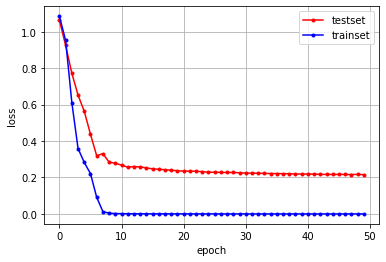

In [125]:
y_vloss4 = history4.history['val_loss']
y_loss4 = history4.history['loss']
x_len4 = np.arange(len(y_loss4))
import matplotlib.pyplot as plt
#크로스되는 부분으로 에폭을 조정해야 오버피팅을 막을수 있음
plt.plot(x_len4,y_vloss4,marker='.',c='red',label='testset')
plt.plot(x_len4,y_loss4,marker='.',c='blue',label='trainset')
plt.legend(loc='best')
plt.grid()#모눈종이형태
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# TF_IDF 2

In [126]:
X_train5, X_eval5, Y_train5, Y_eval5 = train_test_split(tf_main_v, y_train, test_size=0.2, stratify=y_train,
                                                    random_state=666)
print(X_train5.shape)
print(X_eval5)

(98, 7974)
  (0, 41)	0.11372519466550632
  (0, 49)	0.11372519466550632
  (0, 180)	0.11372519466550632
  (0, 220)	0.0934009093968121
  (0, 276)	0.10473155516111364
  (0, 474)	0.09835046638240254
  (0, 626)	0.0803631873736172
  (0, 654)	0.11372519466550632
  (0, 662)	0.07591210179808378
  (0, 712)	0.0934009093968121
  (0, 781)	0.08593760382774045
  (0, 823)	0.0577018958450141
  (0, 829)	0.10586100163051329
  (0, 837)	0.08593760382774045
  (0, 844)	0.04619450775714024
  (0, 849)	0.1380650832186313
  (0, 935)	0.044176658719344335
  (0, 974)	0.10750634971274672
  (0, 983)	0.11037629452306581
  (0, 1003)	0.09567659993337847
  (0, 1030)	0.05599481958612076
  (0, 1039)	0.09801198589712906
  (0, 1180)	0.05955138700244811
  (0, 1199)	0.05365781332621188
  (0, 1203)	0.041034702332468656
  :	:
  (24, 7231)	0.014184539272478798
  (24, 7257)	0.06284567602639167
  (24, 7283)	0.02319601946798461
  (24, 7329)	0.03412121938317419
  (24, 7332)	0.028023279533530027
  (24, 7385)	0.04979078508494674
  (24, 

In [127]:
model = Sequential()
#model.add(Embedding(word_size,63))
#model.add(GRU(63,input_shape=(None,6169))) # RNN 셀의 hidden_size는 32
model.add(Dense(98,input_shape=(98,7974),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(1024,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3, activation='softmax'))
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 98, 98)            781550    
_________________________________________________________________
dense_31 (Dense)             (None, 98, 50)            4950      
_________________________________________________________________
dense_32 (Dense)             (None, 98, 30)            1530      
_________________________________________________________________
dense_33 (Dense)             (None, 98, 10)            310       
_________________________________________________________________
dense_34 (Dense)             (None, 98, 3)             33        
Total params: 788,373
Trainable params: 788,373
Non-trainable params: 0
_________________________________________________________________


In [128]:
# MODEL_DIR = './model_tf-idf_end/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)
# modelpath = MODEL_DIR + "2차tf-{epoch:02d}-{val_loss:.4f}.hdf5"
# checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=False)
history5 = model.fit(X_train5, Y_train5, epochs=50, batch_size = 5,
                    validation_data=(X_eval5, Y_eval5), verbose=1)
# ,callbacks=[checkpointer]
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_eval5, Y_eval5)[1]))
print(np.argmax(model.predict(X_eval5), axis=1))

Epoch 1/50
20/20 [==============================] - 0s 8ms/step - loss: 1.0878 - accuracy: 0.5714 - val_loss: 1.0658 - val_accuracy: 0.8800
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.9704 - accuracy: 0.8061 - val_loss: 0.9373 - val_accuracy: 0.8400
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.9388 - val_loss: 0.6695 - val_accuracy: 0.9600
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 1.0000 - val_loss: 0.3807 - val_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.2939 - val_accuracy: 0.9600
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2549 - val_accuracy: 0.9600
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9600
Epoch 8/50
20/20 [==

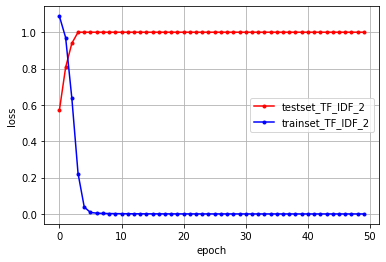

In [144]:
y_vloss5 = history5.history['accuracy']
y_loss5 = history5.history['loss']
x_len5 = np.arange(len(y_loss5))
import matplotlib.pyplot as plt
#크로스되는 부분으로 에폭을 조정해야 오버피팅을 막을수 있음
plt.plot(x_len5,y_vloss5,marker='.',c='red',label='testset_TF_IDF_2')
plt.plot(x_len5,y_loss5,marker='.',c='blue',label='trainset_TF_IDF_2')
plt.legend(loc='best')
plt.grid()#모눈종이형태
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 그래프 통합

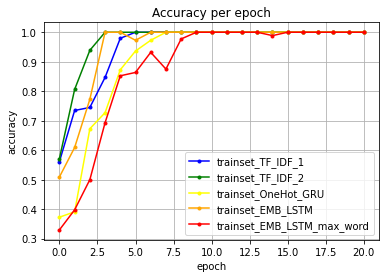

In [176]:
y_vloss5 = history5.history['accuracy']
y_vloss = history.history['accuracy']
y_vloss1 = history1.history['accuracy']
y_vloss2 = history2.history['accuracy']
y_vloss4 = history4.history['accuracy']

# x_len5 = np.arange(len(y_loss5))
# x_len = np.arange(len(y_loss))
# x_len1 = np.arange(len(y_loss1))
# x_len2 = np.arange(len(y_loss2))
# x_len4 = np.arange(len(y_loss4))


x_len5 = np.arange(21)
x_len = np.arange(21)
x_len1 = np.arange(21)
x_len2 = np.arange(21)
x_len4 = np.arange(21)


# plt.plot(x_len4,y_vloss4,marker='.',c='blue',label='trainset_TF_IDF_1')
# plt.plot(x_len5,y_vloss5,marker='.',c='green',label='trainset_TF_IDF_2')
# plt.plot(x_len,y_vloss,marker='.',c='yellow',label='trainset_OneHot_GRU')
# plt.plot(x_len1,y_vloss1,marker='.',c='orange',label='trainset_EMB_LSTM')
# plt.plot(x_len2,y_vloss2,marker='.',c='red',label='trainset_EMB_LSTM_max_word')



plt.plot(x_len4,y_vloss4[:21],marker='.',c='blue',label='trainset_TF_IDF_1')
plt.plot(x_len5,y_vloss5[:21],marker='.',c='green',label='trainset_TF_IDF_2')
plt.plot(x_len,y_vloss[:21],marker='.',c='yellow',label='trainset_OneHot_GRU')
plt.plot(x_len1,y_vloss1[:21],marker='.',c='orange',label='trainset_EMB_LSTM')
plt.plot(x_len2,y_vloss2[:21],marker='.',c='red',label='trainset_EMB_LSTM_max_word')

                   
plt.title('Accuracy per epoch')                  
plt.legend(loc='best')
plt.grid()#모눈종이형태
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

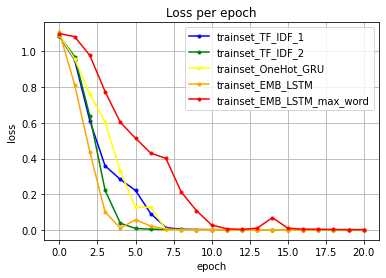

In [174]:
y_loss5 = history5.history['loss']
y_loss = history.history['loss']
y_loss1 = history1.history['loss']
y_loss2 = history2.history['loss']
y_loss4 = history4.history['loss']


# x_len5 = np.arange(len(y_loss5))
# x_len = np.arange(len(y_loss))
# x_len1 = np.arange(len(y_loss1))
# x_len2 = np.arange(len(y_loss2))
# x_len4 = np.arange(len(y_loss4))


x_len5 = np.arange(21)
x_len = np.arange(21)
x_len1 = np.arange(21)
x_len2 = np.arange(21)
x_len4 = np.arange(21)


plt.plot(x_len4,y_loss4[:21],marker='.',c='blue',label='trainset_TF_IDF_1')
plt.plot(x_len5,y_loss5[:21],marker='.',c='green',label='trainset_TF_IDF_2')
plt.plot(x_len,y_loss[:21],marker='.',c='yellow',label='trainset_OneHot_GRU')
plt.plot(x_len1,y_loss1[:21],marker='.',c='orange',label='trainset_EMB_LSTM')
plt.plot(x_len2,y_loss2[:21],marker='.',c='red',label='trainset_EMB_LSTM_max_word')

                   
plt.title('Loss per epoch')                  
plt.legend(loc='best')
plt.grid()#모눈종이형태
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()